# Regression with Deep Learning

In [1]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 hours 52 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_megan_bvn2lk
H2O cluster total nodes:,1
H2O cluster free memory:,1.213 Gb
H2O cluster total cores:,3
H2O cluster allowed cores:,3
H2O cluster status:,"locked, healthy"


In [3]:
# import the airlines data again
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
# split the data
train, valid, test = data.split_frame([0.8,0.1], seed=69)

In [5]:
# set up our x and y differently for regression problem
y = 'ArrDelay'
ignore_fields = ['ArrDelay', 'IsArrDelayed', 'ActualElapsedTime', 
                 'ArrTime', 'TailNum']
x_with_dep = [i for i in train.names if i not in ignore_fields]

In [6]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [7]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances=True)
%time m_DLR_def.train(x_with_dep, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 335 ms, sys: 47 ms, total: 382 ms
Wall time: 51.8 s


In [8]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 52.68622092679348
RMSE: 7.25852746270161
MAE: 4.687539769768553
RMSLE: NaN
Mean Residual Deviance: 52.68622092679348


In [9]:
m_DLR_def.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 47.186337615445176
RMSE: 6.869231224485399
MAE: 4.567561773431662
RMSLE: NaN
Mean Residual Deviance: 47.186337615445176


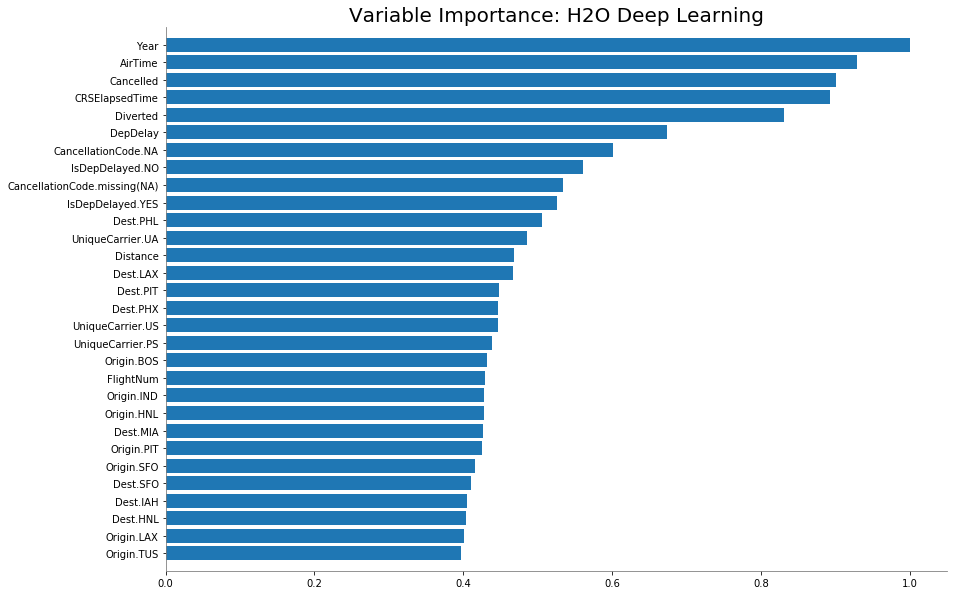

In [10]:
m_DLR_def.varimp_plot(30)

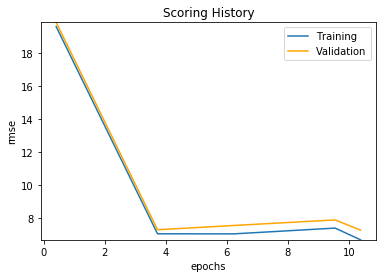

In [11]:
m_DLR_def.plot()

In [12]:
m_DLR_200_epochs = H2ODeepLearningEstimator(
                    variable_importances=True,
                    epochs=200,
                    stopping_rounds=5,
                    stopping_tolerance=0,
                    stopping_metric='deviance'
)
%time m_DLR_200_epochs.train(x_with_dep, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 550 ms, sys: 69.8 ms, total: 620 ms
Wall time: 3min 44s


In [13]:
m_DLR_200_epochs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 45.551601238831054
RMSE: 6.74919263607367
MAE: 3.3159498433904795
RMSLE: NaN
Mean Residual Deviance: 45.551601238831054


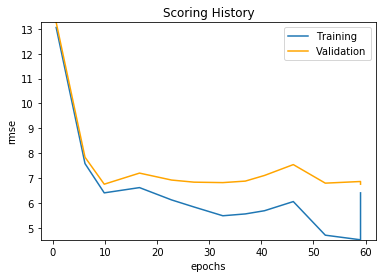

In [14]:
m_DLR_200_epochs.plot()

In [15]:
m_DLR_200_epochs.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-02-22 22:45:13,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-02-22 22:45:19,9.439 sec,4314 obs/sec,0.615629,1,21704.0,13.054082,170.409070,9.928300,0.799620,13.260948,175.852741,9.965731,0.795310
2,,2020-02-22 22:45:44,34.075 sec,7684 obs/sec,6.149170,10,216789.0,7.578805,57.438291,5.148561,0.932460,7.834553,61.380222,5.181570,0.928554
3,,2020-02-22 22:45:59,49.624 sec,8366 obs/sec,9.842661,16,347003.0,6.400571,40.967306,3.254085,0.951827,6.749193,45.551601,3.315950,0.946979
4,,2020-02-22 22:46:23,1 min 13.688 sec,9227 obs/sec,16.609077,27,585553.0,6.611977,43.718240,4.222898,0.948593,7.195674,51.777724,4.425630,0.939731
5,,2020-02-22 22:46:45,1 min 34.581 sec,9694 obs/sec,22.766586,37,802636.0,6.116781,37.415011,3.577909,0.956004,6.916069,47.832015,3.816935,0.944324
6,,2020-02-22 22:47:01,1 min 50.575 sec,9826 obs/sec,27.074656,44,954517.0,5.832017,34.012422,3.279111,0.960006,6.830935,46.661676,3.661102,0.945686
7,,2020-02-22 22:47:18,2 min 7.759 sec,10191 obs/sec,32.606184,53,1149531.0,5.479099,30.020522,2.603791,0.964700,6.813275,46.420713,3.101888,0.945967
8,,2020-02-22 22:47:34,2 min 23.087 sec,10254 obs/sec,36.915048,60,1301440.0,5.552924,30.834960,3.444757,0.963742,6.873338,47.242778,3.966825,0.945010
9,,2020-02-22 22:47:48,2 min 37.386 sec,10262 obs/sec,40.601872,66,1431419.0,5.681861,32.283546,3.121108,0.962038,7.101208,50.427150,3.659376,0.941303


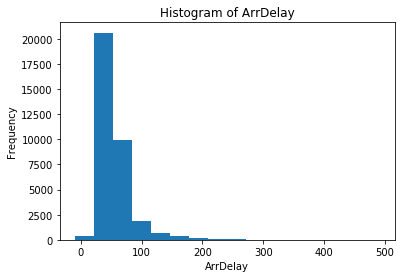

In [20]:
train['ArrDelay'].hist()

In [21]:
m_DLR_laplace = H2ODeepLearningEstimator(
                    variable_importances=True,
                    epochs=200,
                    distribution='laplace'
)
%time m_DLR_laplace.train(x_with_dep, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 809 ms, sys: 91.5 ms, total: 900 ms
Wall time: 5min


In [22]:
m_DLR_laplace.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 44.213086295017604
RMSE: 6.649292164961441
MAE: 2.8724200447439117
RMSLE: NaN
Mean Residual Deviance: 2.8724200447439117


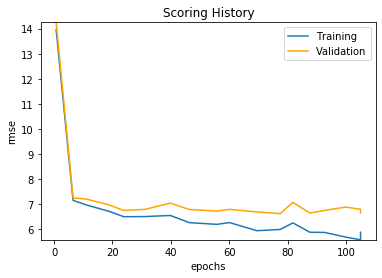

In [23]:
m_DLR_laplace.plot()